### Get all time related vectors from BehaviorSync and create some basic comparisons

In [13]:
import pathlib
from datetime import datetime, date
current_working_directory = pathlib.Path.cwd()
sync_results_folder = pathlib.Path(current_working_directory, 'sync_results')


wshift = True
datefile = date(2026,2,18)
datefilestr = datefile.strftime('%Y%m%d')


sync_results_filenamewhsift_base = 'time_comparison_stats_behaviorsync_wshift_'
sync_results_filename_base = 'time_comparison_stats_behaviorsync_'

sync_results_file = pathlib.Path(sync_results_folder, sync_results_filename_base+datefilestr+'.pkl')
syncwshift_results_file = pathlib.Path(sync_results_folder, sync_results_filenamewhsift_base+datefilestr+'.pkl')
sync_results_file



PosixPath('/mnt/cup/braininit/Shared/repos/TestU19PipelinePython/U19-pipeline-python/notebooks/ephys_element/ephys_sync_notebooks/sync_results/time_comparison_stats_behaviorsync_20260218.pkl')

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pkl

In [19]:
with open(str(sync_results_file), 'rb') as f:
    sync_df = pkl.load(f)

with open(str(syncwshift_results_file), 'rb') as f:
    sync_wshift_df = pkl.load(f)

In [20]:
sync_wshift_df = sync_wshift_df.sort_values(by='min_diff_time_trial_full_session')
sync_wshift_df = sync_wshift_df.reset_index(drop=True)
sync_wshift_df

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,363,ms81_M029,2024-09-03,0,-0.000644,0.009956,0.010600,0.008142,0.018742,0.001892,...,0.070744,0.072360,0.014298,0.070913,0.072491,99.994890,99.825857,99.840401,99.994890,99.830574
1,362,ms81_M029,2024-08-29,0,-0.000328,0.010672,0.011000,0.004305,0.015305,0.001198,...,0.026016,0.030576,0.015023,0.026451,0.030844,99.986710,99.854552,99.865627,99.986710,99.858613
2,446,jk8386_jk62,2025-02-08,0,-0.000980,0.025819,0.026800,0.021958,0.048757,0.024496,...,0.005191,0.015454,0.012945,0.009388,0.017644,99.985809,99.877324,99.884262,99.986124,99.653102
3,498,jk8386_jk86,2025-09-24,0,-0.000652,0.009748,0.010400,-0.005188,0.005212,0.000906,...,0.003857,0.011836,0.010373,0.009331,0.014226,99.996187,99.900226,99.905310,99.996187,99.901497
4,556,jyanar_ya054,2026-01-02,0,0.007342,0.017143,0.009801,0.079298,0.089099,0.981944,...,0.044040,0.059112,0.047949,0.045728,0.061584,99.785517,99.489756,99.435006,99.785517,98.935486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,542,jk8386_jknpx7,2025-11-26,0,-0.016786,0.000814,0.017600,-0.031101,-0.013502,0.005937,...,0.001667,0.010606,0.009732,0.006748,0.011822,99.999755,99.874494,99.880377,99.999510,99.875719
258,592,jk8386_jknpx7,2026-01-20,0,-0.001327,0.009273,0.010600,-0.019186,-0.008586,0.000039,...,0.002236,0.016206,0.014728,0.007500,0.017081,99.999747,99.788085,99.794399,99.999747,99.788842
259,521,jk8386_jknpx6,2025-11-25,0,-0.005241,0.008558,0.013800,-0.013100,0.000700,0.013751,...,0.003147,0.018996,0.016958,0.007552,0.019758,99.999745,99.706716,99.714367,99.999745,99.708501
260,464,jk8386_jk83,2025-07-09,0,-1.006168,-0.985769,0.020400,-0.965538,-0.945138,0.012572,...,0.003152,0.015207,0.013414,0.011521,0.022893,99.996730,99.918253,99.921522,99.996730,96.873978


In [21]:

sync_wshift_df = sync_wshift_df[~sync_wshift_df['recording_id'].isin([363,362])]
sync_df        =        sync_df[~sync_df['recording_id'].isin([363,362])]


#### "pulse only sync" Each trial individual time [0, ...] x ntrials 
#### Historgrams stats -- (behavior file - nidaq pulse signal). Each trial ind. time'

Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')

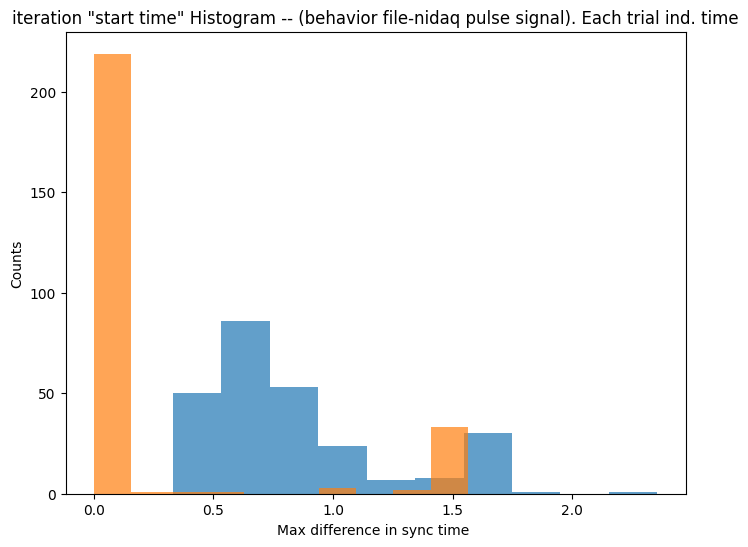

In [24]:
plt.figure(figsize=(8, 6))

plt.hist(sync_df['max_diff_time_trial_ind'], alpha=0.7)
plt.hist(sync_wshift_df['max_diff_time_trial_ind'],alpha=0.7)



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

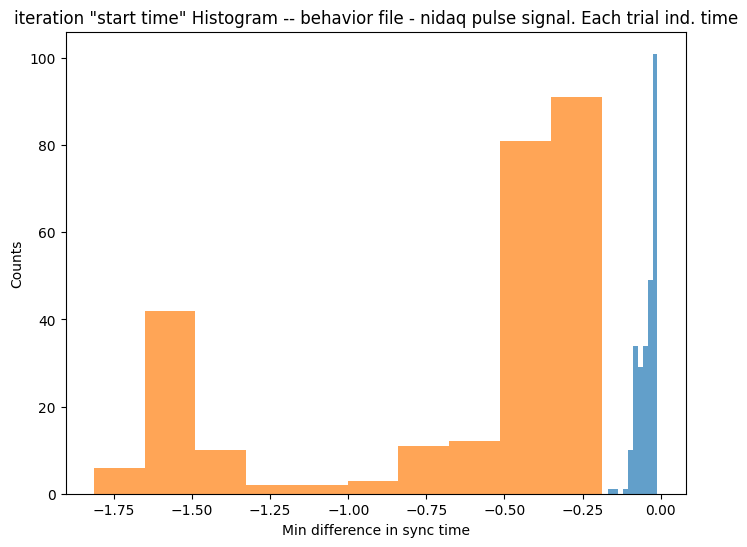

In [26]:
plt.figure(figsize=(8, 6))

plt.hist(sync_df['min_diff_time_trial_ind'], alpha=0.7)
plt.hist(sync_wshift_df['min_diff_time_trial_ind'],alpha=0.7)




plt.xlabel('Min difference in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')

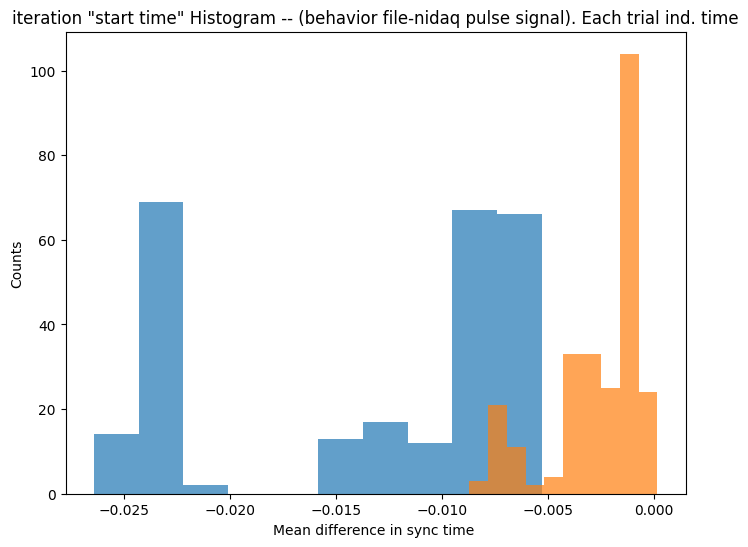

In [31]:
plt.figure(figsize=(8, 6))

plt.hist(sync_df['mean_diff_time_trial_ind'], alpha=0.7)
plt.hist(sync_wshift_df['mean_diff_time_trial_ind'],alpha=0.7)



plt.xlabel('Mean difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

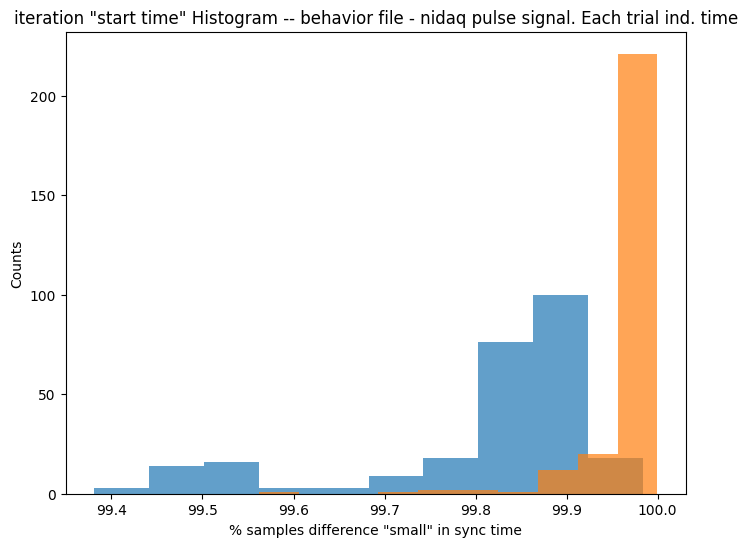

In [27]:
plt.figure(figsize=(8, 6))

plt.hist(sync_df['percent_little_diff_time_trial_ind'], alpha=0.7)
plt.hist(sync_wshift_df['percent_little_diff_time_trial_ind'],alpha=0.7)



plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



#### "pulse only sync" single vector time for all session [0, ...] x 1
####  Historgrams stats  -- (behavior file - nidaq pulse signal) single vector time


Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

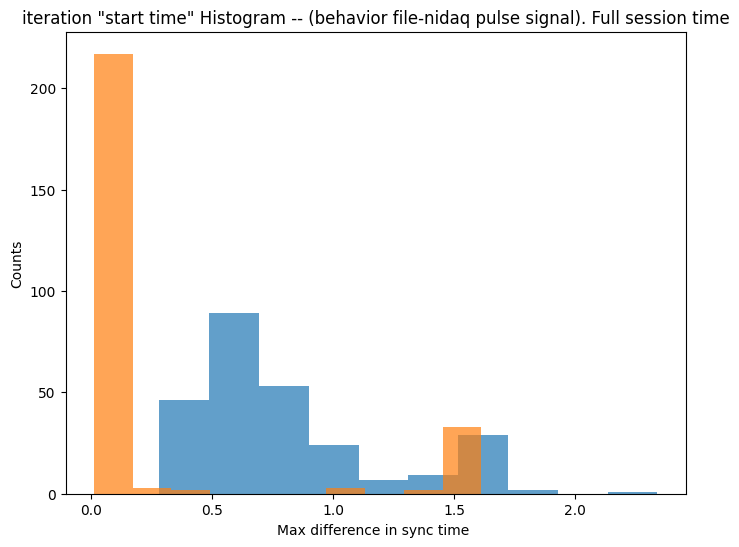

In [28]:
plt.figure(figsize=(8, 6))


plt.hist(sync_df['max_diff_time_trial_full_session'], alpha=0.7)
plt.hist(sync_wshift_df['max_diff_time_trial_full_session'],alpha=0.7)



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

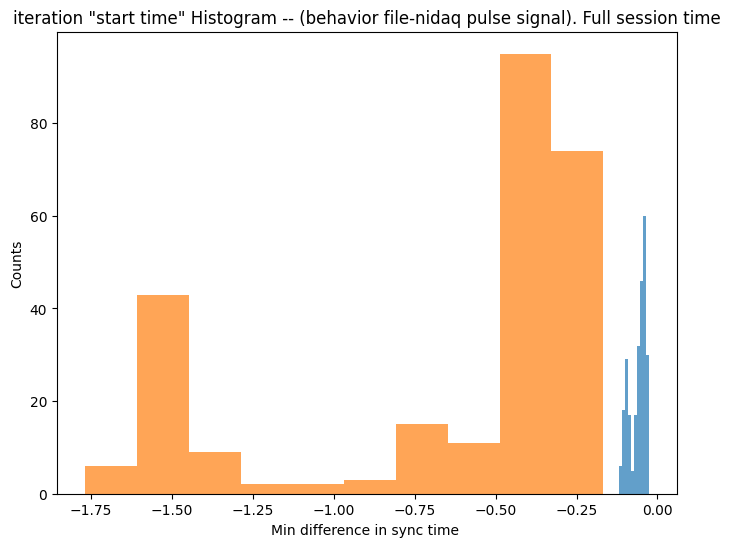

In [33]:
plt.figure(figsize=(8, 6))


plt.hist(sync_df['min_diff_time_trial_full_session'], alpha=0.7)
plt.hist(sync_wshift_df['min_diff_time_trial_full_session'],alpha=0.7)



plt.xlabel('Min difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

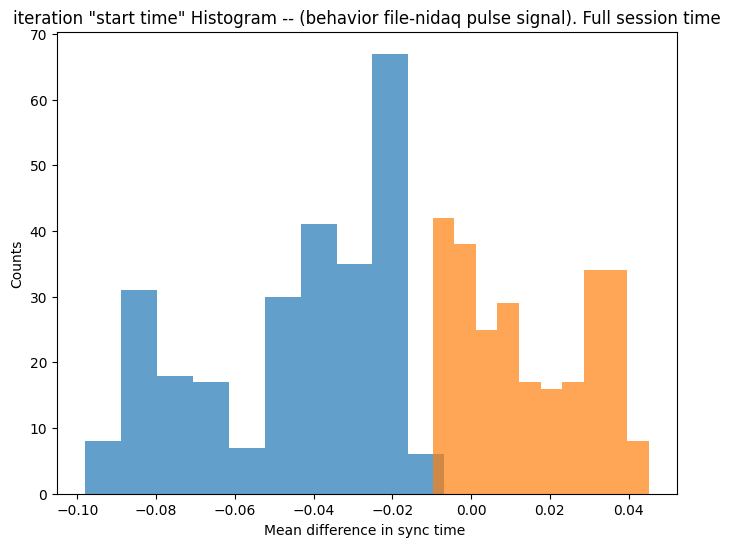

In [32]:
plt.figure(figsize=(8, 6))



plt.hist(sync_df['mean_diff_time_trial_full_session'], alpha=0.7)
plt.hist(sync_wshift_df['mean_diff_time_trial_full_session'],alpha=0.7)




plt.xlabel('Mean difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')

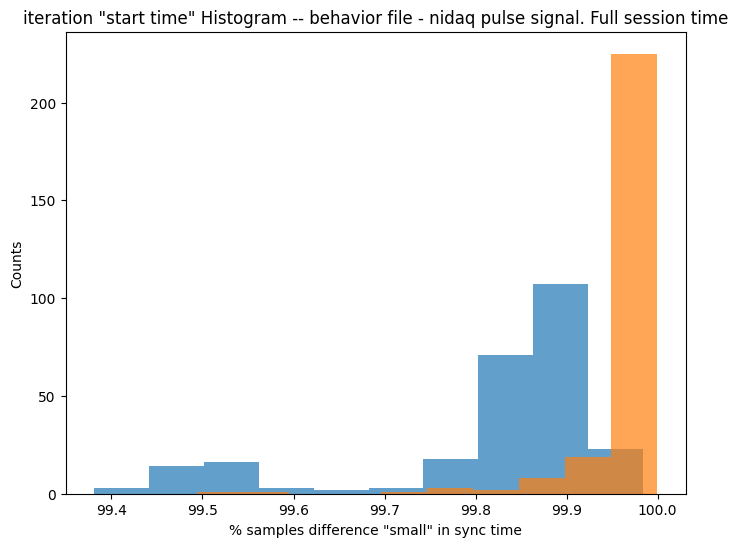

In [30]:
plt.figure(figsize=(8, 6))


plt.hist(sync_df['percent_little_diff_time_trial_full_session'], alpha=0.7)
plt.hist(sync_wshift_df['percent_little_diff_time_trial_full_session'],alpha=0.7)


plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')



In [35]:
sync_wshift_df = sync_wshift_df.sort_values(by=['min_diff_time_trial_full_session'])
sync_wshift_df =sync_wshift_df.reset_index(drop=True)
sync_wshift_df.loc[0,:]

recording_id                                             446
subject_fullname                                 jk8386_jk62
session_date                                      2025-02-08
session_number                                             0
last_diff_trial_ind                                 -0.00098
last_diff_trial_ind_v                               0.025819
last_diff_trial_inds                                  0.0268
last_diff_time_trial_full_session                   0.021958
last_diff_time_trial_full_session_v                 0.048757
max_diff_time_trial_ind                             0.024496
max_diff_time_trial_ind_v                           0.087088
max_diff_time_trial_inds                            0.073999
max_diff_time_trial_full_session                    0.112351
max_diff_time_trial_full_session_v                  0.185851
min_diff_time_trial_ind                            -1.791895
min_diff_time_trial_ind_v                          -1.766495
min_diff_time_trial_inds